## About Dataset
#### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

1. **ID**: ID of each client
2. **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. **SEX**: Gender (1=male, 2=female)
4. **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
6. **AGE**: Age in years
7. **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. **PAY_2** : Repayment status in August, 2005 (scale same as above)
9. **PAY_3** : Repayment status in July, 2005 (scale same as above)
10. **PAY_4**: Repayment status in June, 2005 (scale same as above)
11. **PAY_5**: Repayment status in May, 2005 (scale same as above)
12. **PAY_6**: Repayment status in April, 2005 (scale same as above)
13. **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
14. **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
15. **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
16. **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
17. **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
18. **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
19. **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
20. **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
21. **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
22. **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
23. **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
24. **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
25. **default.payment.next.month**: Default payment (1=yes, 0=no)

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import roc_curve, auc

In [403]:
original_df = pd.read_csv('default of credit card clients.csv')
data = original_df.copy()
data.shape

(30001, 25)

In [404]:
data.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [405]:
#Fixing column labels
data= data.set_axis(data.iloc[0], axis=1)
data = data.drop(data.index[0])
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [406]:
## Dropping ID since it is useless here
data.drop(columns=['ID'], inplace=True)

In [407]:
## making columns lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [408]:
#cleaning column names
new_names = {'pay_0': 'repay_status_sept', 'pay_2': 'repay_status_aug', 'pay_3': 'repay_status_jul', 
             'pay_4': 'repay_status_jun', 'pay_5': 'repay_status_may', 'pay_6': 'repay_status_apr',
            'bill_amt1': 'bill_sept', 'bill_amt2': 'bill_aug', 'bill_amt3': 'bill_jul', 'bill_amt4': 'bill_jun',
            'bill_amt5': 'bill_may', 'bill_amt6': 'bill_apr', 'pay_amt1': 'pay_amt_sept', 'pay_amt2': 'pay_amt_aug',
            'pay_amt3': 'pay_amt_jul', 'pay_amt4': 'pay_amt_jun', 'pay_amt5': 'pay_amt_may', 'pay_amt6': 'pay_amt_apr',
            'default payment next month': 'defaulted'}
data.rename(columns=new_names, inplace=True)

In [409]:
data.head(5)

,limit_bal,sex,education,marriage,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,...,bill_jun,bill_may,bill_apr,pay_amt_sept,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,defaulted
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Dependent Variable Info**

<AxesSubplot:xlabel='defaulted', ylabel='count'>

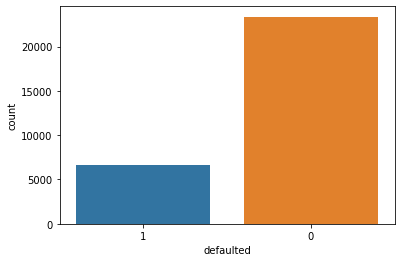

In [410]:
sns.countplot(x = 'defaulted', data = data)

In [466]:
# a lot more people who have not defaulted vs those who have - data is imbalanced 

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   limit_bal          30000 non-null  object
 1   sex                30000 non-null  object
 2   education          30000 non-null  object
 3   marriage           30000 non-null  object
 4   age                30000 non-null  object
 5   repay_status_sept  30000 non-null  object
 6   repay_status_aug   30000 non-null  object
 7   repay_status_jul   30000 non-null  object
 8   repay_status_jun   30000 non-null  object
 9   repay_status_may   30000 non-null  object
 10  repay_status_apr   30000 non-null  object
 11  bill_sept          30000 non-null  object
 12  bill_aug           30000 non-null  object
 13  bill_jul           30000 non-null  object
 14  bill_jun           30000 non-null  object
 15  bill_may           30000 non-null  object
 16  bill_apr           30000 non-null  objec

In [467]:
## NO NULL VALUES

In [413]:
## Converting columns to numeric:# Iterate over the columns in the DataFrame
for column in data.columns:
    # Check if the column can be converted to a float
    if data[column].str.contains('\.').any():
        # If the column contains decimal points, convert it to a float
        data[column] = data[column].astype(float)
    else:
        # If the column does not contain decimal points, convert it to an integer
        data[column] = data[column].astype(int)

In [414]:
data.dtypes

0
limit_bal            int64
sex                  int64
education            int64
marriage             int64
age                  int64
repay_status_sept    int64
repay_status_aug     int64
repay_status_jul     int64
repay_status_jun     int64
repay_status_may     int64
repay_status_apr     int64
bill_sept            int64
bill_aug             int64
bill_jul             int64
bill_jun             int64
bill_may             int64
bill_apr             int64
pay_amt_sept         int64
pay_amt_aug          int64
pay_amt_jul          int64
pay_amt_jun          int64
pay_amt_may          int64
pay_amt_apr          int64
defaulted            int64
dtype: object

<AxesSubplot:xlabel='defaulted', ylabel='limit_bal'>

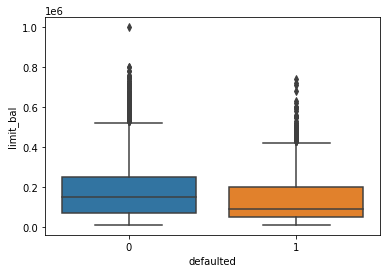

In [415]:
sns.boxplot(x="defaulted", y="limit_bal", data=data)

<AxesSubplot:xlabel='defaulted', ylabel='repay_status_sept'>

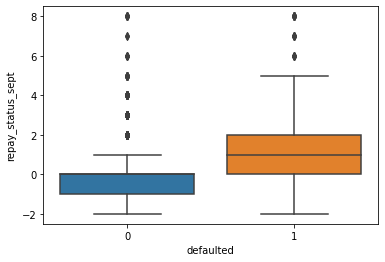

In [416]:
sns.boxplot(x="defaulted", y="repay_status_sept", data=data)

<AxesSubplot:xlabel='defaulted', ylabel='repay_status_aug'>

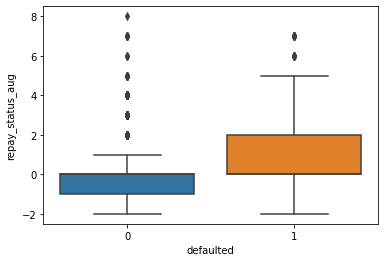

In [417]:
sns.boxplot(x="defaulted", y="repay_status_aug", data=data)

<AxesSubplot:xlabel='defaulted', ylabel='repay_status_jul'>

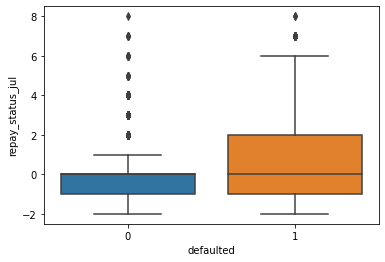

In [418]:
sns.boxplot(x="defaulted", y="repay_status_jul", data=data)

<AxesSubplot:xlabel='defaulted', ylabel='repay_status_jun'>

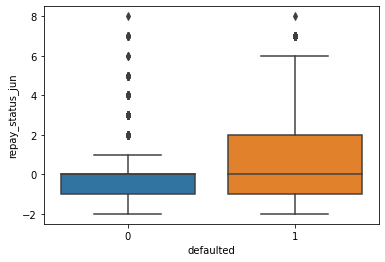

In [419]:
sns.boxplot(x="defaulted", y="repay_status_jun", data=data)

**Observations**
1. Of the continuous variables, repay statuses in most months seem to be important
2. Limit balance may also have some significance as a predictor variable

In [421]:
data2 = data.copy()

In [422]:
y = data2['defaulted'].copy()
X = data2

In [423]:
# Print the number of unique values and their counts for each column
for column in X.columns:
    print(f"{column}: {X[column].nunique()}")

limit_bal: 81
sex: 2
education: 7
marriage: 4
age: 56
repay_status_sept: 11
repay_status_aug: 11
repay_status_jul: 11
repay_status_jun: 11
repay_status_may: 10
repay_status_apr: 10
bill_sept: 22723
bill_aug: 22346
bill_jul: 22026
bill_jun: 21548
bill_may: 21010
bill_apr: 20604
pay_amt_sept: 7943
pay_amt_aug: 7899
pay_amt_jul: 7518
pay_amt_jun: 6937
pay_amt_may: 6897
pay_amt_apr: 6939
defaulted: 2


**Observations**
1. Why do education and marriage have 7 and 4 unique values respectively?

In [424]:
## analyzing education values
X['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [425]:
## I will combine 5,6, and 0 with the unknown category (4)
X['education'] = X['education'].replace({5: 4, 6: 4, 0: 4})
X['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [426]:
# analyzing marriage values
X['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [427]:
#combining 0 with others category (3)
X['marriage'] = X['marriage'].replace({0: 3})
X['marriage'].value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

<AxesSubplot:xlabel='marriage', ylabel='count'>

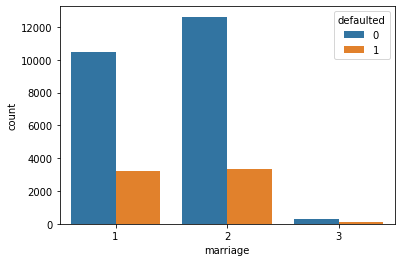

In [428]:
sns.countplot(x="marriage",hue='defaulted',data=X)

**Based on countplots - distrubutions of people who default and don't default don't seem to change much for any level of any categorical variable.**

In [429]:
## Encoding education, marriage, and sex since they are unordered nominal features
education_onehot = pd.get_dummies(X['education'], prefix='education')

# Rename the education columns with the corresponding education levels
education_levels = {
    'education_1': 'graduate_school',
    'education_2': 'university',
    'education_3': 'high_school',
    'education_4': 'others_education'
}
education_onehot = education_onehot.rename(columns=education_levels)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, education_onehot], axis=1)

# Remove the original "education" column
X = X.drop(['education'], axis=1)

marriage_onehot = pd.get_dummies(X['marriage'], prefix='marriage')

# Rename the marriage columns with the corresponding marital statuses
marital_statuses = {
    'marriage_1': 'married',
    'marriage_2': 'single',
    'marriage_3': 'others_married'
}
marriage_onehot = marriage_onehot.rename(columns=marital_statuses)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, marriage_onehot], axis=1)

# Remove the original "marriage" column
X = X.drop(['marriage'], axis=1)

sex_onehot = pd.get_dummies(X['sex'],prefix='sex')
sex_status = {
    'sex_1': 'sex_male',
    'sex_2': 'sex_female'
}
sex_onehot = sex_onehot.rename(columns=sex_status)
X = pd.concat([X, sex_onehot], axis=1)
X = X.drop(['sex'],axis=1)

In [430]:
X.columns

Index(['limit_bal', 'age', 'repay_status_sept', 'repay_status_aug',
       'repay_status_jul', 'repay_status_jun', 'repay_status_may',
       'repay_status_apr', 'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun',
       'bill_may', 'bill_apr', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_jul',
       'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'defaulted',
       'graduate_school', 'university', 'high_school', 'others_education',
       'married', 'single', 'others_married', 'sex_male', 'sex_female'],
      dtype='object')

In [431]:
X = X.drop(['sex_female'],axis=1)
X = X.drop(['single'],axis=1)
X = X.drop(['graduate_school'],axis=1)

<AxesSubplot:title={'center':'Credit Card Data Heatmap'}>

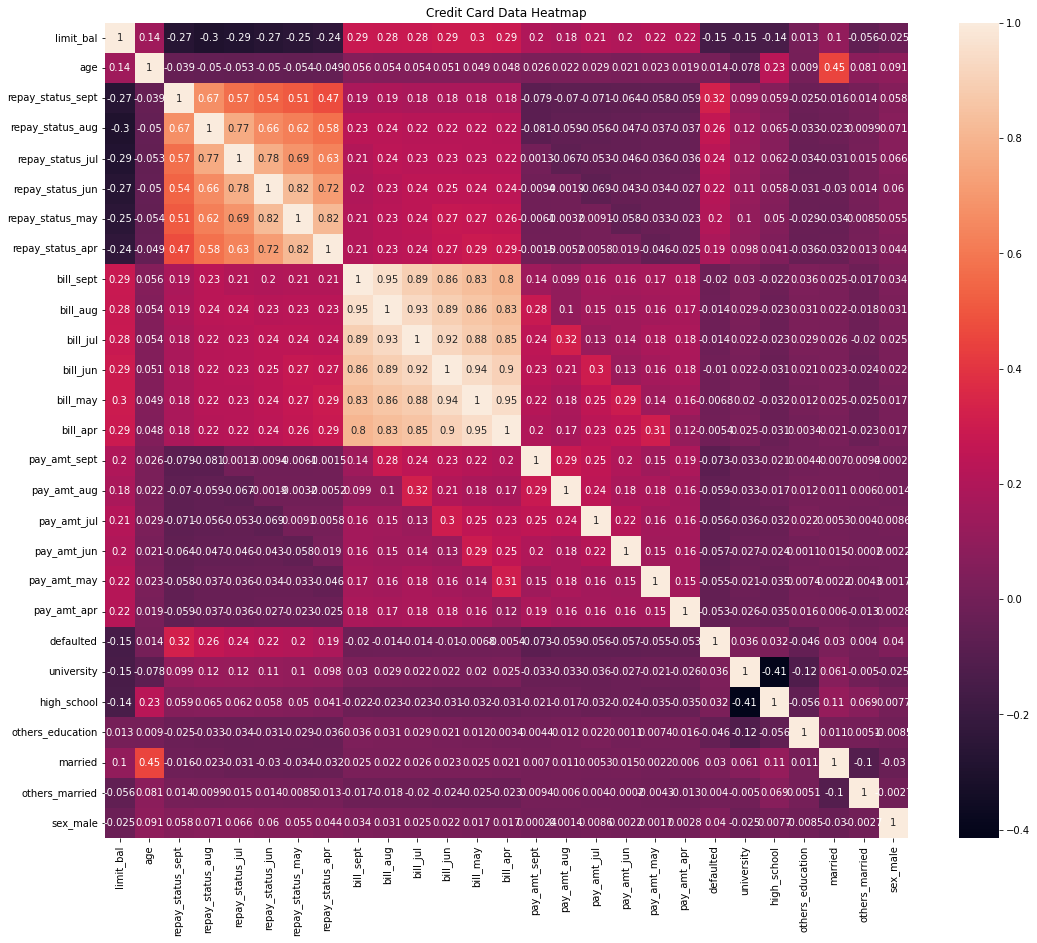

In [432]:
corr = X.corr()
plt.figure(figsize=(18,15))
plt.title('Credit Card Data Heatmap')
sns.heatmap(corr,annot=True)

In [433]:
df = X.drop(['defaulted'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df = add_constant(df)
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

for i in range(len(df.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(df.values, i)

print(vif_data)

              feature        VIF
0               const  20.107827
1           limit_bal   1.579845
2                 age   1.385131
3   repay_status_sept   1.919991
4    repay_status_aug   3.175423
5    repay_status_jul   3.658305
6    repay_status_jun   4.287850
7    repay_status_may   4.725465
8    repay_status_apr   3.256654
9           bill_sept  14.036195
10           bill_aug  25.866616
11           bill_jul  21.782218
12           bill_jun  20.349079
13           bill_may  25.005016
14           bill_apr  15.043004
15       pay_amt_sept   1.708412
16        pay_amt_aug   2.237360
17        pay_amt_jul   1.758122
18        pay_amt_jun   1.648807
19        pay_amt_may   1.688175
20        pay_amt_apr   1.170035
21         university   1.367183
22        high_school   1.410436
23   others_education   1.038240
24            married   1.324131
25     others_married   1.041375
26           sex_male   1.025608


**Needed to conduct feature engineering with bill amounts in each month - decided to take average bill amount over this 6-month timespan**

In [434]:
X['avg_bill_per_month'] = (X['bill_apr']+X['bill_may']+X['bill_jun']+X['bill_jul']+X['bill_aug']+X['bill_sept'])/6

In [435]:
X = X.drop(['bill_apr'],axis=1)
X = X.drop(['bill_may'],axis=1)
X = X.drop(['bill_jun'],axis=1)
X = X.drop(['bill_jul'],axis=1)
X = X.drop(['bill_aug'],axis=1)
X = X.drop(['bill_sept'],axis=1)

<AxesSubplot:title={'center':'Credit Card Data Heatmap'}>

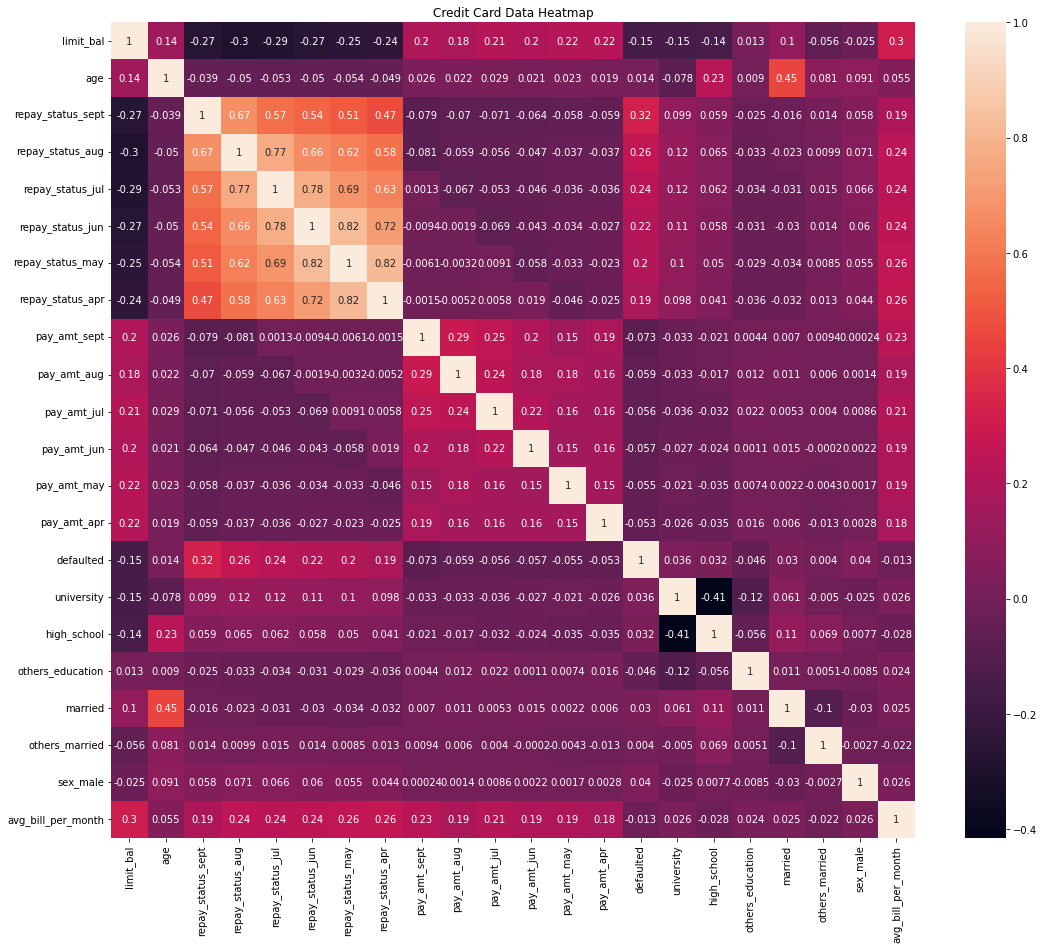

In [436]:
corr = X.corr()
plt.figure(figsize=(18,15))
plt.title('Credit Card Data Heatmap')
sns.heatmap(corr,annot=True)

In [437]:
df = X.drop(['defaulted'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df = add_constant(df)
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

for i in range(len(df.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(df.values, i)

print(vif_data)

               feature        VIF
0                const  20.105049
1            limit_bal   1.573617
2                  age   1.385078
3    repay_status_sept   1.919064
4     repay_status_aug   3.152230
5     repay_status_jul   3.637357
6     repay_status_jun   4.275971
7     repay_status_may   4.704195
8     repay_status_apr   3.205212
9         pay_amt_sept   1.216845
10         pay_amt_aug   1.185204
11         pay_amt_jul   1.195769
12         pay_amt_jun   1.147558
13         pay_amt_may   1.111350
14         pay_amt_apr   1.108975
15          university   1.365155
16         high_school   1.408877
17    others_education   1.034871
18             married   1.323861
19      others_married   1.040994
20            sex_male   1.024393
21  avg_bill_per_month   1.461133


<AxesSubplot:xlabel='defaulted', ylabel='avg_bill_per_month'>

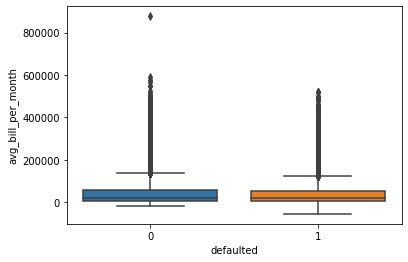

In [438]:
sns.boxplot(x="defaulted", y="avg_bill_per_month", data=X)

In [439]:
Xf = X.drop('defaulted', axis=1).values
yf = X['defaulted']

yf = yf.astype(int)
print(Xf.shape)
print(yf.shape)

(30000, 21)
(30000,)


**Feature Importance**

In [440]:
## Tree-Based estimators
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=10)
dt.fit(Xf,yf)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [441]:
##Running Feature Importance
fi_col = []
fi = []
for i,column in enumerate(X.drop('defaulted',axis=1)):
    print("The feature importance for {} is : {}".format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for limit_bal is : 0.051043335068634864
The feature importance for age is : 0.04025816152377746
The feature importance for repay_status_sept is : 0.45308076167439326
The feature importance for repay_status_aug is : 0.11078083534571533
The feature importance for repay_status_jul is : 0.011939233563439972
The feature importance for repay_status_jun is : 0.012485179233748468
The feature importance for repay_status_may is : 0.019035900673433127
The feature importance for repay_status_apr is : 0.015876015301579623
The feature importance for pay_amt_sept is : 0.030310399284207815
The feature importance for pay_amt_aug is : 0.03343643158495553
The feature importance for pay_amt_jul is : 0.06802073521008033
The feature importance for pay_amt_jun is : 0.020906769590065908
The feature importance for pay_amt_may is : 0.02251958591338328
The feature importance for pay_amt_apr is : 0.01661137310212801
The feature importance for university is : 0.0030949935188275754
The featur

In [442]:
## Creating a dataframe
fi_df = zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])
fi_df.sort_values('Feature Importance',ascending=False).reset_index()

,index,Feature,Feature Importance
0,2,repay_status_sept,0.453081
1,3,repay_status_aug,0.110781
2,20,avg_bill_per_month,0.072723
3,10,pay_amt_jul,0.068021
4,0,limit_bal,0.051043
5,1,age,0.040258
6,9,pay_amt_aug,0.033436
7,8,pay_amt_sept,0.030310
8,12,pay_amt_may,0.022520
9,11,pay_amt_jun,0.020907


**Splitting model into train and test datasets**

In [443]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X1 = X.drop('defaulted', axis=1)
y1 = X['defaulted']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [444]:
X_train['defaulted'] = y_train
X_test['defaulted'] = y_test

In [445]:
Xt = X_train.drop('defaulted',axis=1)

**Backwards Selection**

In [446]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.logit('defaulted~' + '+'.join(predictor_subset),data = X_train).fit()
    bic = model.bic
    return {"model":model, "BIC":bic}

In [447]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [448]:
def backward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"], index = range(1,len(Xt.columns)))

    tic = time.time()
    predictors = Xt.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [449]:
models_best = backward_selection()

Optimization terminated successfully.
         Current function value: 0.465042
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465269
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465048
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465491
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465860
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465167
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465063
  

Optimization terminated successfully.
         Current function value: 0.465587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465926
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465239
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465228
  

Optimization terminated successfully.
         Current function value: 0.466100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.483509
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.466075
         Iterations 7
Processed  12 models on 11 predictors in 0.7150051593780518 seconds.
Optimization terminated successfully.
         Current function value: 0.466383
         Iterations 7
Optimization 

Text(0, 0.5, 'AIC')

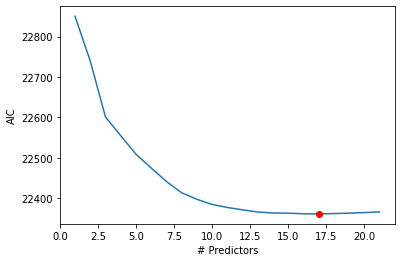

In [450]:
aic = models_best.apply(lambda row: row[1].aic, axis=1)
plt.plot(aic)
plt.plot(1+aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

Text(0, 0.5, 'BIC')

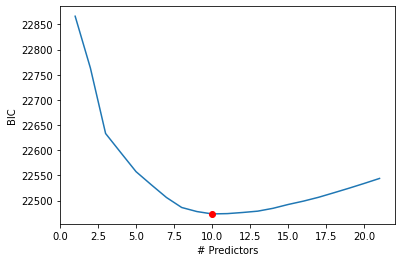

In [451]:
bic = models_best.apply(lambda row: row[1].bic, axis=1)
plt.plot(bic)
plt.plot(1+bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [452]:
best_subset_model = models_best.loc[10,'model']
models_best.loc[10,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              defaulted   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23989
Method:                           MLE   Df Model:                           10
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.1196
Time:                        22:41:32   Log-Likelihood:                -11181.
converged:                       True   LL-Null:                       -12700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.2106      0.035    -34.604      0.000      -1.279      -1.142
limit_bal          -8.309e-07   1.65e-07     -5.036      0.000   -1.15e-06   -5.07e-07
repay_status_sept      0.5853      0.020     29.522      0.000       0.546       0.624
repay_status_aug       0.1071      0.020      5.420      0.000       0.068       0.146
repay_status_jun       0.1111      0.018      6.072      0.000       0.075       0.147
pay_amt_sept        -7.89e-06    2.1e-06     -3.762      0.000    -1.2e-05   -3.78e-06
pay_amt_aug        -1.065e-05   2.21e-06     -4.828      0.000    -1.5e-05   -6.33e-06
others_education      -1.0646      0.202     -5.271      0.000      -1.460      -0.669
married                0.2234      0.034      6.629      0.000       0.157       0.289
sex_male               0.1306      0.034      3.851      0.000       0.064       0.197
avg_bill_per_month -1.968e-06    3.5e-07     -5.625      0.000   -2.65e-06   -1.28e-06
======================================================================================
"""

**Kaitlin/Andy: need to find performance measures for this model**

**Forward Selection**

In [453]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in Xt.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [454]:
def forward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(Xt.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [455]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.516120
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529021
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.475962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494804
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505725
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508957
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.512020
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.523815
  

Optimization terminated successfully.
         Current function value: 0.469441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.468790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469206
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469506
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.469505
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.468675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.468616
  

Optimization terminated successfully.
         Current function value: 0.466097
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.466229
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.466236
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.466250
         Iterations 7
Processed  12 models on 10 predictors in 0.6989166736602783 seconds.
Optimization terminated successfully.
         Current function value: 0.465771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465907
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465940
         Iterations 7
Optimization 

Text(0, 0.5, 'AIC')

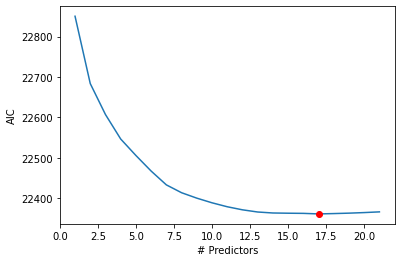

In [456]:
aic = models_best.apply(lambda row: row[1].aic, axis=1)
plt.plot(aic)
plt.plot(1+aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

Text(0, 0.5, 'BIC')

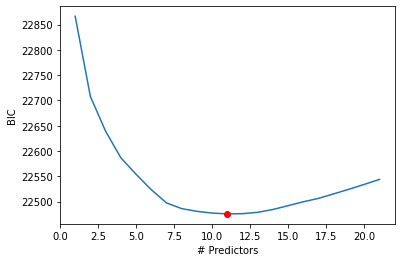

In [457]:
bic = models_best.apply(lambda row: row[1].bic, axis=1)
plt.plot(bic)
plt.plot(1+bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [458]:
best_subset_model = models_best.loc[11,'model']
models_best.loc[11,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              defaulted   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23988
Method:                           MLE   Df Model:                           11
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.1199
Time:                        22:41:46   Log-Likelihood:                -11177.
converged:                       True   LL-Null:                       -12700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.2136      0.035    -34.662      0.000      -1.282      -1.145
repay_status_sept      0.5852      0.020     29.487      0.000       0.546       0.624
limit_bal          -8.078e-07   1.65e-07     -4.892      0.000   -1.13e-06   -4.84e-07
repay_status_jul       0.0708      0.025      2.794      0.005       0.021       0.120
pay_amt_sept       -8.716e-06   2.17e-06     -4.014      0.000    -1.3e-05   -4.46e-06
married                0.2243      0.034      6.654      0.000       0.158       0.290
others_education      -1.0589      0.202     -5.246      0.000      -1.455      -0.663
avg_bill_per_month  -2.01e-06    3.5e-07     -5.736      0.000    -2.7e-06   -1.32e-06
pay_amt_aug        -9.663e-06   2.18e-06     -4.442      0.000   -1.39e-05    -5.4e-06
sex_male               0.1298      0.034      3.827      0.000       0.063       0.196
repay_status_jun       0.0765      0.022      3.457      0.001       0.033       0.120
repay_status_aug       0.0774      0.022      3.441      0.001       0.033       0.121
======================================================================================
"""

**Kaitlin/Andy - need to find performance measures for this as well**

**Standardizing test/train datasets for any Lasso regression**
**Should do any interactions/transformations using models above**

In [459]:
#applying a standard scaler to the data to give values more equal weight between columns
X_train_std = X_train.drop('defaulted',axis=1)
X_test_std = X_test.drop('defaulted',axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train_std), columns=X_train_std.columns)
X_test_std = pd.DataFrame(scaler.fit_transform(X_test_std), columns=X_test_std.columns)

In [400]:
X_train_std['defaulted'] = X_train['defaulted']
X_test_std['defaulted'] = X_test['defaulted']

In [461]:
X_train['defaulted'].value_counts()

0    18677
1     5323
Name: defaulted, dtype: int64

In [462]:
X_test['defaulted'].value_counts()

0    4687
1    1313
Name: defaulted, dtype: int64

In [463]:
X_train_std['defaulted'] = X_train.defaulted.reset_index(drop=True)

In [465]:
X_test_std['defaulted'] = X_test.defaulted.reset_index(drop=True)